# WeBull Portfolio Analysis, Using Mordern Portfolio Theory (MPT)

Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

##### Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only and to track the performance of my paper trading account since the affect of COVID-19 using Financial Engineering strategies for portfolio management and optimizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
WB_Stocks = pd.read_csv("WB_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

In [4]:
WB_Stocks = WB_Stocks.loc["2020-3-19":"2020-5-26"]

In [5]:
WB_Stocks.tail().dropna()

,AAPL,BAC,BLK,ESS,JPM,KO,MSFT,NEE,O,PG,V,WM
Date,,,,,,,,,,,,
2020-05-18,314.96,22.93,516.43,240.60,90.45,44.97,184.40,235.45,53.07,116.21,191.38,99.66
2020-05-19,313.14,22.21,501.20,230.99,88.67,44.54,183.12,230.50,52.59,112.44,189.36,98.33
2020-05-20,319.23,22.91,508.74,235.86,91.33,45.89,185.66,232.79,51.44,113.28,193.86,99.45
2020-05-21,316.85,22.90,508.51,235.43,90.17,45.17,183.43,228.90,51.75,111.62,190.62,98.93
2020-05-22,318.89,22.66,513.30,236.41,89.47,45.03,183.51,233.85,52.15,112.60,190.86,98.92


In [6]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [8]:
ret = WB_Stocks.pct_change().dropna()

In [9]:
ret.tail().dropna()

,AAPL,BAC,BLK,ESS,JPM,KO,MSFT,NEE,O,PG,V,WM
Date,,,,,,,,,,,,
2020-05-18,0.02,0.07,0.01,0.06,0.05,0.04,0.01,0.03,0.06,0.01,0.04,0.04
2020-05-19,-0.01,-0.03,-0.03,-0.04,-0.02,-0.01,-0.01,-0.02,-0.01,-0.03,-0.01,-0.01
2020-05-20,0.02,0.03,0.02,0.02,0.03,0.03,0.01,0.01,-0.02,0.01,0.02,0.01
2020-05-21,-0.01,-0.00,-0.00,-0.00,-0.01,-0.02,-0.01,-0.02,0.01,-0.01,-0.02,-0.01
2020-05-22,0.01,-0.01,0.01,0.00,-0.01,-0.00,0.00,0.02,0.01,0.01,0.00,-0.00


Risk and Return of stocks due to the impact of COVID-19:

In [10]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.61,0.48
BAC,0.67,0.79
BLK,1.72,0.76
ESS,0.98,0.71
JPM,0.55,0.69
KO,0.54,0.50
MSFT,1.54,0.48
NEE,0.88,0.65
O,0.82,0.82
PG,0.22,0.44


Plot Risk and Returns:

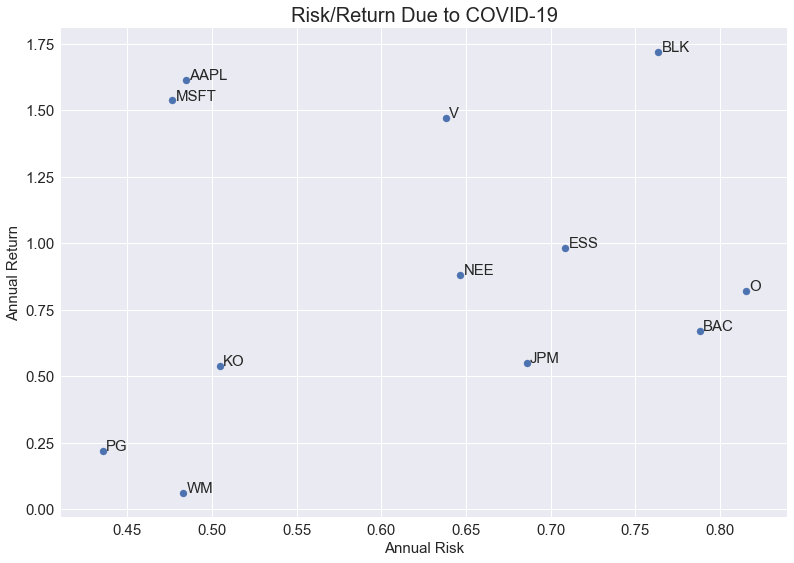

In [11]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of stocks in the portfolio (12), and 200,000 simulations of portfolios:

In [13]:
noa = len(WB_Stocks.columns)
nop = 200000
print(noa, nop)

12 200000


Creating simulation:

In [14]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

Over 200,000 differnt weight combinations for each stock in the portfolio:

In [15]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.10691519, 0.04392533, 0.03482403, ..., 0.06019407, 0.05268136,
        0.11191663],
       [0.07465156, 0.01015807, 0.06775309, ..., 0.14458601, 0.12331314,
        0.10400535],
       [0.15213851, 0.06801154, 0.07618865, ..., 0.10396457, 0.0896751 ,
        0.06575873],
       ...,
       [0.14998055, 0.120254  , 0.0536881 , ..., 0.11869713, 0.03068064,
        0.05756865],
       [0.13546697, 0.00226867, 0.12612688, ..., 0.11692145, 0.14779013,
        0.0016273 ],
       [0.10818301, 0.01237415, 0.10068024, ..., 0.06751137, 0.06102123,
        0.13057046]])

In [16]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 simulated portfolios:

In [17]:
port_ret = ret.dot(weights.T)

In [18]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,...,0.04,0.04,0.03,0.04,0.03,0.04,0.04,0.04,0.03,0.04
2020-05-19,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
2020-05-20,0.02,0.01,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.01,...,0.01,0.01,0.02,0.01,0.02,0.01,0.02,0.02,0.02,0.02
2020-05-21,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2020-05-22,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00


Annual Risk and Return of 200,000 simulated Portfolios:

In [19]:
port_summary = ann_risk_return(port_ret)

In [20]:
port_summary.tail().dropna()

,Return,Risk
199995,0.77,0.53
199996,0.97,0.52
199997,0.86,0.51
199998,1.12,0.51
199999,0.88,0.53


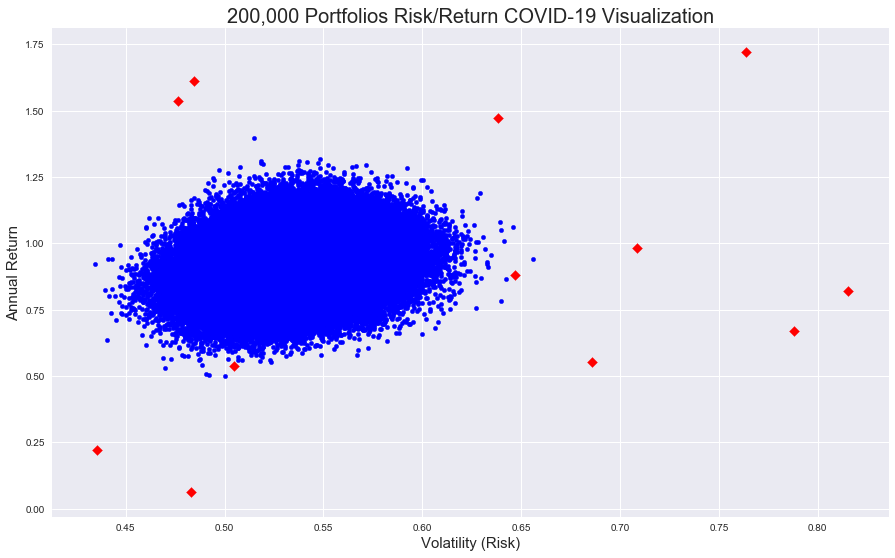

In [21]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 19th 2020 to May 26 2020, we're going to be using the 3 month government bond, which is at 0.14% as the Risk Free rate. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

In [22]:
risk_free_return = 0.014
risk_free_risk = 0

In [23]:
rf = [risk_free_return, risk_free_risk]
rf

[0.014, 0]

Sharpe Ratios for stocks in the portfolio:

In [24]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.61,0.48,3.30
BAC,0.67,0.79,0.83
BLK,1.72,0.76,2.23
ESS,0.98,0.71,1.37
JPM,0.55,0.69,0.78
KO,0.54,0.50,1.04
MSFT,1.54,0.48,3.20
NEE,0.88,0.65,1.34
O,0.82,0.82,0.99
PG,0.22,0.44,0.47


Stock Sharpe Ratio Analysis: Notice that  all the stocks in this portfolio have positive values for the sharpe ratio. This mean's we are expecting gains from these stocks. 

Sharpe Ratio for 200,000 simulated Portfolios:

In [25]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [26]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,0.77,0.53,1.43
199996,0.97,0.52,1.85
199997,0.86,0.51,1.65
199998,1.12,0.51,2.16
199999,0.88,0.53,1.62


In [27]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,0.92,0.53,1.71
std,0.09,0.02,0.17
min,0.50,0.43,0.97
25%,0.86,0.52,1.59
50%,0.92,0.53,1.71
75%,0.98,0.55,1.82
max,1.40,0.66,2.69


out of 200,000 portfolio simulations, our maximum results lead to an 140% return, 66% risk and sharpe ratio of 2.69. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all the return of this portfolio combination is greater then the risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

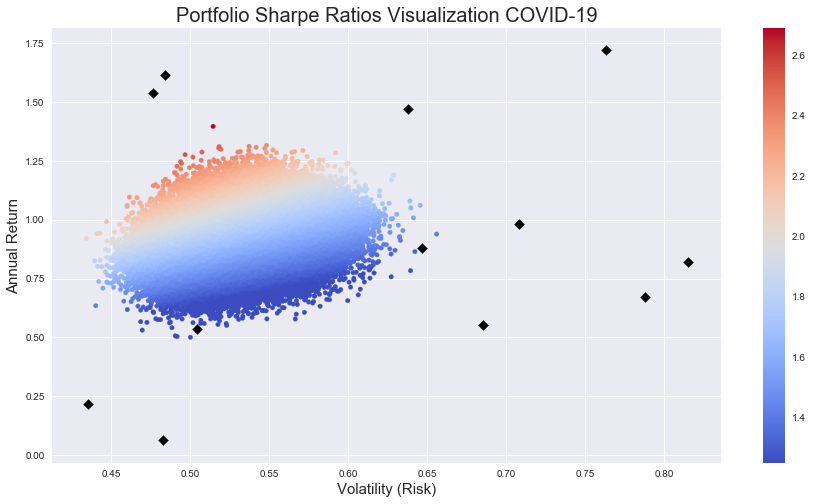

In [30]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 1.25, vmax = 2.69, alpha = 1.20)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

The portfolio with the Max sharpe ratio is portfolio 121,765 out of 200,000 simulations:

In [31]:
msrp = port_summary.Sharpe.idxmax()
msrp

121765

Results of the Max Sharpe Ratio Portfolio, Includes: 140% Return, 51% Risk, and a Sharpe Ratio of 2.69 !! 

In [32]:
port_summary.loc[msrp]

Return   1.40
Risk     0.51
Sharpe   2.69
Name: 121765, dtype: float64

Obtaining the "optimal weights" from the Max Sharpe Ratio Portfolio:

In [33]:
msrp_w = weights[msrp, :]
msrp_w

array([0.24347352, 0.02719608, 0.2110993 , 0.07606155, 0.01571743,
       0.02203183, 0.28348999, 0.00955617, 0.06011696, 0.00292106,
       0.02136746, 0.02696864])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [35]:
pd.Series(index = WB_Stocks.columns, data = msrp_w)

AAPL   0.24
BAC    0.03
BLK    0.21
ESS    0.08
JPM    0.02
KO     0.02
MSFT   0.28
NEE    0.01
O      0.06
PG     0.00
V      0.02
WM     0.03
dtype: float64

Optimization Analysis: Notice the optimal portfolio, has 0% in PG, and high alloctions in MSFT, AAPL and BLK.

## Systematic and Unsystematic Risk 

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

In [36]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,1.61,0.48,3.30,0.23
BAC,0.67,0.79,0.83,0.62
BLK,1.72,0.76,2.23,0.58
ESS,0.98,0.71,1.37,0.50
JPM,0.55,0.69,0.78,0.47
KO,0.54,0.50,1.04,0.25
MSFT,1.54,0.48,3.20,0.23
NEE,0.88,0.65,1.34,0.42
O,0.82,0.82,0.99,0.66
PG,0.22,0.44,0.47,0.19


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [37]:
COV = ret.cov()*252
COV

,AAPL,BAC,BLK,ESS,JPM,KO,MSFT,NEE,O,PG,V,WM
AAPL,0.23,0.26,0.25,0.20,0.20,0.18,0.21,0.24,0.23,0.13,0.25,0.14
BAC,0.26,0.62,0.45,0.37,0.51,0.31,0.24,0.40,0.53,0.19,0.43,0.30
BLK,0.25,0.45,0.58,0.38,0.38,0.30,0.25,0.41,0.42,0.20,0.38,0.25
ESS,0.20,0.37,0.38,0.50,0.31,0.26,0.17,0.32,0.42,0.15,0.31,0.25
JPM,0.20,0.51,0.38,0.31,0.47,0.26,0.19,0.34,0.44,0.13,0.36,0.25
KO,0.18,0.31,0.30,0.26,0.26,0.25,0.17,0.27,0.25,0.14,0.25,0.16
MSFT,0.21,0.24,0.25,0.17,0.19,0.17,0.23,0.23,0.19,0.13,0.24,0.13
NEE,0.24,0.40,0.41,0.32,0.34,0.27,0.23,0.42,0.34,0.20,0.32,0.23
O,0.23,0.53,0.42,0.42,0.44,0.25,0.19,0.34,0.66,0.12,0.42,0.29
PG,0.13,0.19,0.20,0.15,0.13,0.14,0.13,0.20,0.12,0.19,0.15,0.11


In [38]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [39]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,1.61,0.48,3.30,0.23,0.14,0.10
BAC,0.67,0.79,0.83,0.62,0.30,0.32
BLK,1.72,0.76,2.23,0.58,0.25,0.33
ESS,0.98,0.71,1.37,0.50,0.25,0.25
JPM,0.55,0.69,0.78,0.47,0.25,0.22
KO,0.54,0.50,1.04,0.25,0.16,0.10
MSFT,1.54,0.48,3.20,0.23,0.13,0.10
NEE,0.88,0.65,1.34,0.42,0.23,0.19
O,0.82,0.82,0.99,0.66,0.29,0.37
PG,0.22,0.44,0.47,0.19,0.11,0.08


### Systematic and Unsystematic Risk bar graph

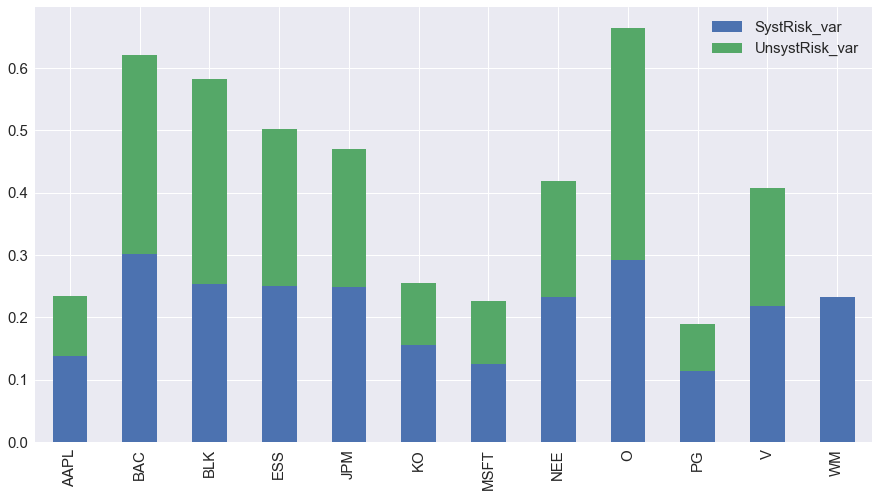

In [40]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stocks in this portfolio that gets affected by the market condidtions the most due to COVID-19 are WM, O, BAC, BLK, ESS, and JPM. the stocks that have the highest Unsystematic risk also company specific risk are O, BAC, BLK, ESS, snd JPM. We should also notice that JPM, BLK, and ESS have very similar systematic risk which could mean they're very closely correlated. 

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. The Market Portfolio in this project will be the S&P 500 index.

In [41]:
WB_Stocks = pd.read_csv("WB_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [43]:
WB_Stocks = WB_Stocks.loc["2020-3-19":"2020-5-26"]
SP500_Index = SP500_Index.loc["2020-3-19":"2020-5-26"]

Closing Prices of the S&P 500 index:

In [44]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-18,2953.91
2020-05-19,2922.94
2020-05-20,2971.61
2020-05-21,2948.51
2020-05-22,2955.45


In [46]:
WB_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [47]:
WB_Stocks.tail().dropna()

,AAPL,BAC,BLK,ESS,JPM,KO,MSFT,NEE,O,PG,V,WM,MP
Date,,,,,,,,,,,,,
2020-05-18,314.96,22.93,516.43,240.60,90.45,44.97,184.40,235.45,53.07,116.21,191.38,99.66,2953.91
2020-05-19,313.14,22.21,501.20,230.99,88.67,44.54,183.12,230.50,52.59,112.44,189.36,98.33,2922.94
2020-05-20,319.23,22.91,508.74,235.86,91.33,45.89,185.66,232.79,51.44,113.28,193.86,99.45,2971.61
2020-05-21,316.85,22.90,508.51,235.43,90.17,45.17,183.43,228.90,51.75,111.62,190.62,98.93,2948.51
2020-05-22,318.89,22.66,513.30,236.41,89.47,45.03,183.51,233.85,52.15,112.60,190.86,98.92,2955.45


Daily Returns Including the Market Portfolio:

In [51]:
ret = WB_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a long list of the daily returns

In [52]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return of the stocks including the Market Portfolio due to COVID-19:

In [53]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.61,0.48
BAC,0.67,0.79
BLK,1.72,0.76
ESS,0.98,0.71
JPM,0.55,0.69
KO,0.54,0.50
MSFT,1.54,0.48
NEE,0.88,0.65
O,0.82,0.82
PG,0.22,0.44


Risk/Return Including the Market Portfolio:

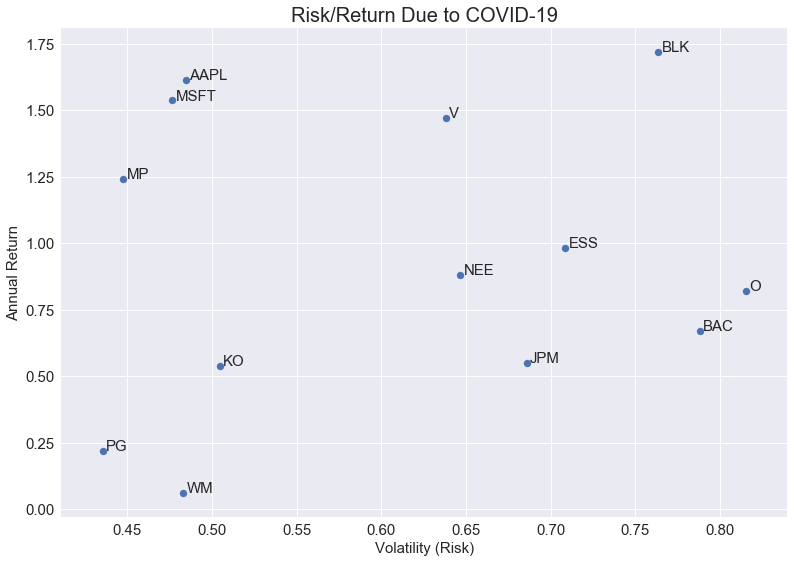

In [54]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [55]:
risk_free_return = 0.014
risk_free_risk = 0

In [56]:
rf = [risk_free_return, risk_free_risk]
rf

[0.014, 0]

Sharpe Ratio of stocks and the Market Portfolio:

In [57]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.61,0.48,3.30
BAC,0.67,0.79,0.83
BLK,1.72,0.76,2.23
ESS,0.98,0.71,1.37
JPM,0.55,0.69,0.78
KO,0.54,0.50,1.04
MSFT,1.54,0.48,3.20
NEE,0.88,0.65,1.34
O,0.82,0.82,0.99
PG,0.22,0.44,0.47


Notice that the Market Porfolo has a postive sharpe ratio, this generally moves we're expecting positive returns in the market.

In [58]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,1.61,0.48,3.30,0.23
BAC,0.67,0.79,0.83,0.62
BLK,1.72,0.76,2.23,0.58
ESS,0.98,0.71,1.37,0.50
JPM,0.55,0.69,0.78,0.47
KO,0.54,0.50,1.04,0.25
MSFT,1.54,0.48,3.20,0.23
NEE,0.88,0.65,1.34,0.42
O,0.82,0.82,0.99,0.66
PG,0.22,0.44,0.47,0.19


In [59]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [61]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [62]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,1.61,0.48,3.30,0.23,0.20,0.04
BAC,0.67,0.79,0.83,0.62,0.31,0.31
BLK,1.72,0.76,2.23,0.58,0.28,0.30
ESS,0.98,0.71,1.37,0.50,0.23,0.27
JPM,0.55,0.69,0.78,0.47,0.26,0.21
KO,0.54,0.50,1.04,0.25,0.19,0.06
MSFT,1.54,0.48,3.20,0.23,0.19,0.04
NEE,0.88,0.65,1.34,0.42,0.25,0.17
O,0.82,0.82,0.99,0.66,0.28,0.39
PG,0.22,0.44,0.47,0.19,0.13,0.06


### Systematic and Unsystematic risk of stocks including the Market Portfolio (S&P500 Index):

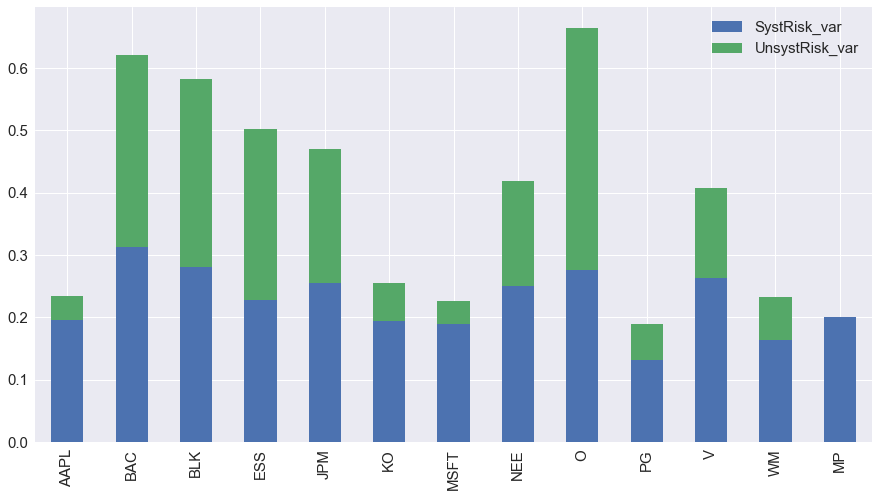

In [63]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Determining the beta of the stocks in the portfolio compared to the Market Portfolio:
Beta is a measure of the volatility, or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [64]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,1.61,0.48,3.30,0.23,0.20,0.04,0.98
BAC,0.67,0.79,0.83,0.62,0.31,0.31,1.56
BLK,1.72,0.76,2.23,0.58,0.28,0.30,1.40
ESS,0.98,0.71,1.37,0.50,0.23,0.27,1.14
JPM,0.55,0.69,0.78,0.47,0.26,0.21,1.28
KO,0.54,0.50,1.04,0.25,0.19,0.06,0.97
MSFT,1.54,0.48,3.20,0.23,0.19,0.04,0.95
NEE,0.88,0.65,1.34,0.42,0.25,0.17,1.25
O,0.82,0.82,0.99,0.66,0.28,0.39,1.38
PG,0.22,0.44,0.47,0.19,0.13,0.06,0.66


Stocks with the highest beta at or above 1.10 include : V, NEE, O, JPM, ESS, BLK, and BAC

## Determining The Security Market Line

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

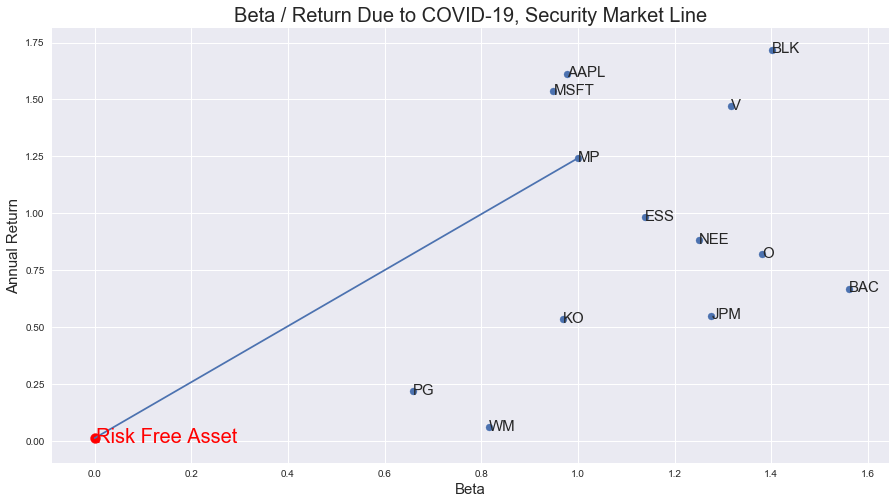

In [65]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: since ESS, NEE, O, BAC, JPM, KO, PG, WM all fall below the SML this is an indictor that they are  underperforming the market. While MSFT, AAPL, V, and BLK are above the SML which means they are all outperforming the Market Portfolio currently which of course could change.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [66]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [67]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,1.61,0.48,3.30,0.23,0.20,0.04,0.98,1.22,0.40
BAC,0.67,0.79,0.83,0.62,0.31,0.31,1.56,1.93,-1.26
BLK,1.72,0.76,2.23,0.58,0.28,0.30,1.40,1.74,-0.02
ESS,0.98,0.71,1.37,0.50,0.23,0.27,1.14,1.41,-0.43
JPM,0.55,0.69,0.78,0.47,0.26,0.21,1.28,1.58,-1.03
KO,0.54,0.50,1.04,0.25,0.19,0.06,0.97,1.21,-0.67
MSFT,1.54,0.48,3.20,0.23,0.19,0.04,0.95,1.18,0.36
NEE,0.88,0.65,1.34,0.42,0.25,0.17,1.25,1.55,-0.67
O,0.82,0.82,0.99,0.66,0.28,0.39,1.38,1.71,-0.89
PG,0.22,0.44,0.47,0.19,0.13,0.06,0.66,0.82,-0.60


CAPM and Alpha Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach postive returns, with V, NEE, O, JPM, ESS, BLK, and BAC being the the highest expected returns in this portfolio since they have the highest beta's. Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that WM, PG, O, NEE, KO, JPM, ESS, BLK and BAC are all stocks in the Portfolio that have a chance of not beating the over all market which makes since, because they falls below the Security Market Line, exception with BLK & V, which have a greater return then the MP, however since the risk of BLK & V are more and the Sharpe Ratio is less then the Market Portfolio this leads us to believe BLK & V have a chance of not beating the Market Portfolio as well.